In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Cleaning and Preparation

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
# List of dataset file path
datasets = [
    ("/content/drive/My Drive/Datasets/vietnamese_tiki_products_review/vietnamese_tiki_products_backpacks_suitcases.csv", 'backpacks_suitcases'),
    ("/content/drive/My Drive/Datasets/vietnamese_tiki_products_review/vietnamese_tiki_products_fashion_accessories.csv", 'fashion_accessories'),
    ("/content/drive/My Drive/Datasets/vietnamese_tiki_products_review/vietnamese_tiki_products_men_bags.csv", 'men_bags'),
    ("/content/drive/My Drive/Datasets/vietnamese_tiki_products_review/vietnamese_tiki_products_men_shoes.csv", 'men_shoes'),
    ("/content/drive/My Drive/Datasets/vietnamese_tiki_products_review/vietnamese_tiki_products_women_bags.csv", 'women_bags'),
    ("/content/drive/My Drive/Datasets/vietnamese_tiki_products_review/vietnamese_tiki_products_women_shoes.csv", 'women_shoes')
]

# Load and combine datasets
# Load, label, and combine datasets
dataframes = []
for file, type_name in datasets:
    df = pd.read_csv(file)
    df['type'] = type_name
    dataframes.append(df)


combined_df = pd.concat(dataframes, ignore_index=True)

# Display basic info to confirm successful combination
print(combined_df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41603 entries, 0 to 41602
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        41603 non-null  int64  
 1   id                41603 non-null  int64  
 2   name              41603 non-null  object 
 3   description       41603 non-null  object 
 4   original_price    41603 non-null  int64  
 5   price             41603 non-null  int64  
 6   fulfillment_type  41602 non-null  object 
 7   brand             41601 non-null  object 
 8   review_count      41603 non-null  int64  
 9   rating_average    41603 non-null  float64
 10  favourite_count   41603 non-null  int64  
 11  pay_later         41603 non-null  bool   
 12  current_seller    41603 non-null  object 
 13  date_created      41603 non-null  int64  
 14  number_of_images  41603 non-null  int64  
 15  vnd_cashback      41603 non-null  int64  
 16  has_video         41603 non-null  bool  

In [42]:
combined_df.head()

Unnamed: 0         id                                               name  \
0           0  179731375  Balo nữ da dầy thời trang unisex màu sắc tươi ...   
1           1  249221065            Ví da đựng thẻ ngân hàng (7 màu) - 9205   
2           2  102862196   Balo nam nữ thời trang họa tiết bò sữa kiểu m...   
3           3  115740385  Vải nhũ bóng simili chống thấm may túi ví balo...   
4           4  102862375   Combo balo vừa a4 và túi tote thời trang kiểu...   

                                         description  original_price  price  \
0    Balo nữ da dầy thời trang unisex màu sắc tươ...           14250  14250   
1                                                ...           10260  10260   
2         Balo họa tiết bò sữa thời trang cho nam...           19999  19999   
3         _ Vải nhũ bóng siêu xinh và cực kì xịn ...           30000  30000   
4         BALO THỜI TRANG - BALO ĐẸP – BALO HỌC S...           29000  29000   

  fulfillment_type brand  review_count  rating_average  favourite_count  \
0         dropship   OEM             0             0.0                0   
1         dropship   OEM             0             0.0                0   
2         dropship   OEM             0             0.0                0   
3         dropship   OEM             0             0.0                0   
4         dropship   OEM             0             0.0                0   

   pay_later          current_seller  date_created  number_of_images  \
0      False           Thiên Ân Balo           488                10   
1      False      SHOP THỜI TRANG 2N           166                 2   
2      False  Xưởng may balo Đà Nẵng           831                 5   
3      False               BB Outlet           775                 4   
4      False  Xưởng may balo Đà Nẵng           831                 5   

   vnd_cashback  has_video category  quantity_sold                 type  
0             0      False  Balo nữ              0  backpacks_suitcases  
1             0      False     Root              0  backpacks_suitcases  
2             0      False     Root              0  backpacks_suitcases  
3             0      False     Root              0  backpacks_suitcases  
4             0      False     Root              0  backpacks_suitcases

In [11]:
combined_df.isnull().sum()

Unnamed: 0            0
id                    0
name                  0
description           0
original_price        0
price                 0
fulfillment_type      1
brand                 2
review_count          0
rating_average        0
favourite_count       0
pay_later             0
current_seller        0
date_created          0
number_of_images      0
vnd_cashback          0
has_video             0
category              0
quantity_sold         0
type                  0
description_length    0
dtype: int64

In [12]:
combined_df.dropna(inplace=True)

In [14]:
combined_df['brand'].replace('\tOEM', 'OEM', inplace=True)

# Brand Performance Analysis

In [17]:
combined_df['brand'].value_counts().describe()

count      823.000000
mean        50.546780
std       1085.667862
min          1.000000
25%          1.000000
50%          3.000000
75%         11.000000
max      31144.000000
Name: count, dtype: float64

In [19]:
# Set the minimum number of sales
min_sales_threshold = 50
# Filter brands with total sales greater than or equal to the threshold
brand_sales = combined_df.groupby('brand')['quantity_sold'].sum()
brands_above_threshold = brand_sales[brand_sales >= min_sales_threshold].index

# Filter the dataset to include only these brands
filtered_df = combined_df[combined_df['brand'].isin(brands_above_threshold)]

##1. Price Comparison by Brand

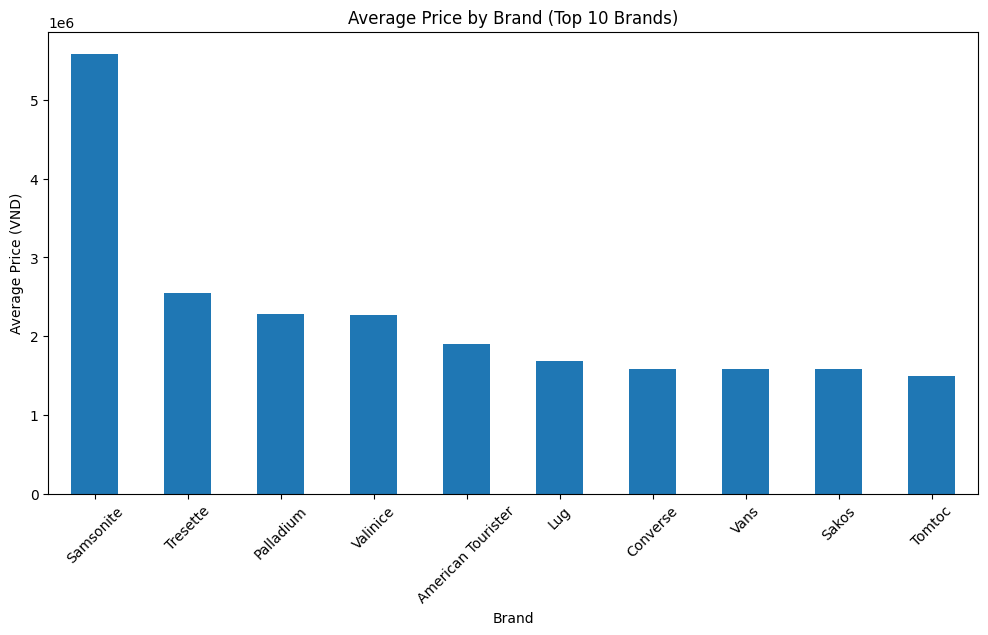

In [20]:
# Average price by brand
brand_price_comparison = filtered_df.groupby('brand')['price'].mean().sort_values(ascending=False)

# Bar plot to visualize average price by brand (top 10 brands)
plt.figure(figsize=(12, 6))
brand_price_comparison.head(10).plot(kind='bar')
plt.title('Average Price by Brand (Top 10 Brands)')
plt.xlabel('Brand')
plt.ylabel('Average Price (VND)')
plt.xticks(rotation=45)
plt.show()


##2. Sales Performance by Brand


brand
OEM            337216
HARAS           38183
buybox          25273
LAZA            24895
Ximo            15968
GOMTAT          15962
Laceva          12593
Praza           10995
Song An Eco      9393
Eye Secret       8682
Name: quantity_sold, dtype: int64
brand
JM Jamano       3553.000000
LAZA            2489.500000
PTA             1189.000000
KOJIBA           993.000000
LIFE             976.250000
Hier             889.666667
Minsu            850.000000
Accede           813.000000
CLEANER LENS     720.000000
HARAS            707.092593
Name: quantity_sold, dtype: float64


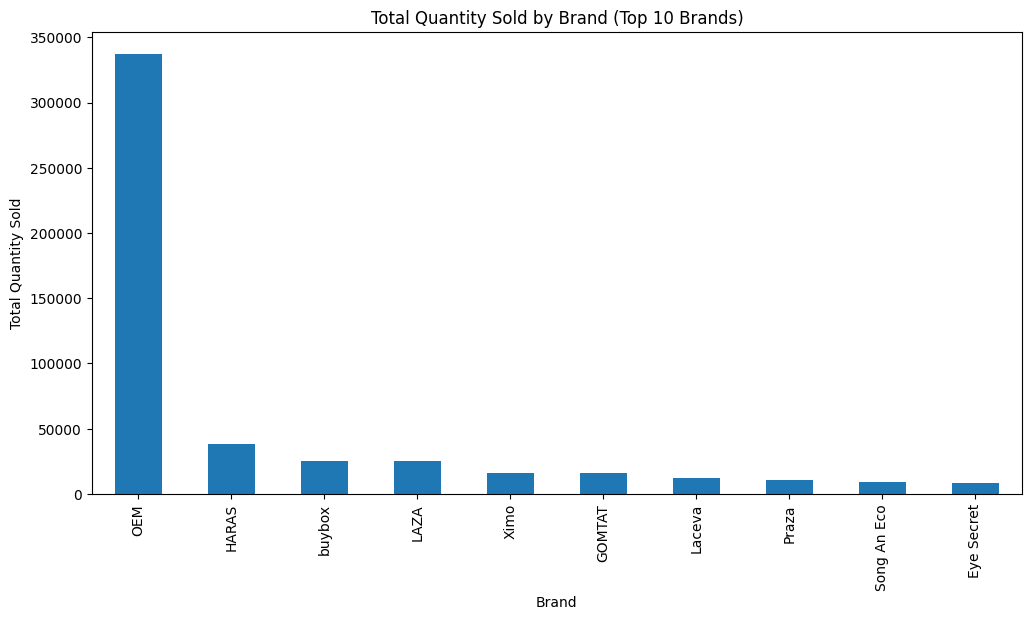

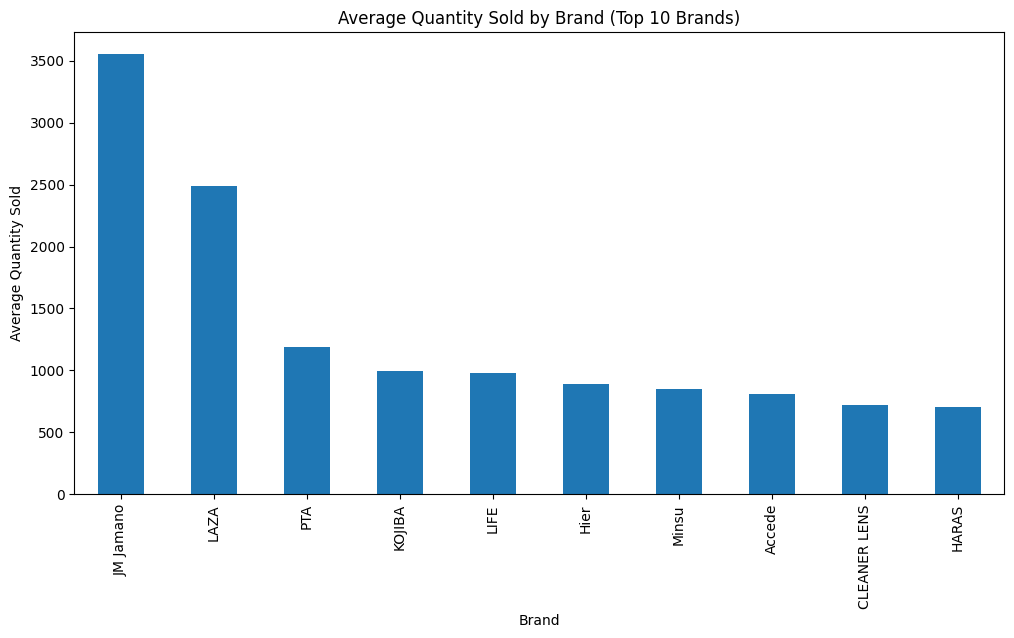

In [21]:
# Total quantity sold by brand
brand_sales_total = filtered_df.groupby('brand')['quantity_sold'].sum().sort_values(ascending=False)
print(brand_sales_total.head(10))  # Display top 10 brands by total quantity sold

# Average quantity sold by brand
brand_sales_average = filtered_df.groupby('brand')['quantity_sold'].mean().sort_values(ascending=False)
print(brand_sales_average.head(10))  # Display top 10 brands by average quantity sold

# Bar plot to visualize sales performance by brand (top 10 brands)
plt.figure(figsize=(12, 6))
brand_sales_total.head(10).plot(kind='bar')
plt.title('Total Quantity Sold by Brand (Top 10 Brands)')
plt.xlabel('Brand')
plt.ylabel('Total Quantity Sold')
plt.show()

plt.figure(figsize=(12, 6))
brand_sales_average.head(10).plot(kind='bar')
plt.title('Average Quantity Sold by Brand (Top 10 Brands)')
plt.xlabel('Brand')
plt.ylabel('Average Quantity Sold')
plt.show()

##3. Discounts by Brand

<ipython-input-22-8ace9514d43a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['discount_amount'] = filtered_df['original_price'] - filtered_df['price']
<ipython-input-22-8ace9514d43a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['discount_percentage'] = (filtered_df['discount_amount'] / filtered_df['original_price']) * 100


brand
KAMILIANT             2.469600e+06
ABER                  2.074400e+06
HOLDALL               1.910000e+06
Lusetti               1.598750e+06
Lug                   1.276190e+06
American Tourister    1.080393e+06
Pierre Cardin         8.307211e+05
Tresette              7.273714e+05
Samsonite             5.825000e+05
TOMOYO                5.467588e+05
Name: discount_amount, dtype: float64
brand
SARIFA           71.196678
KAMILIANT        69.144308
VINIEL VINIEL    68.079082
HOLDALL          62.033926
ABER             60.450543
MI midori        55.000000
GOODFIT          53.333333
Lusetti          52.574080
US ARMY          52.035526
Tsimple          50.000000
Name: discount_percentage, dtype: float64


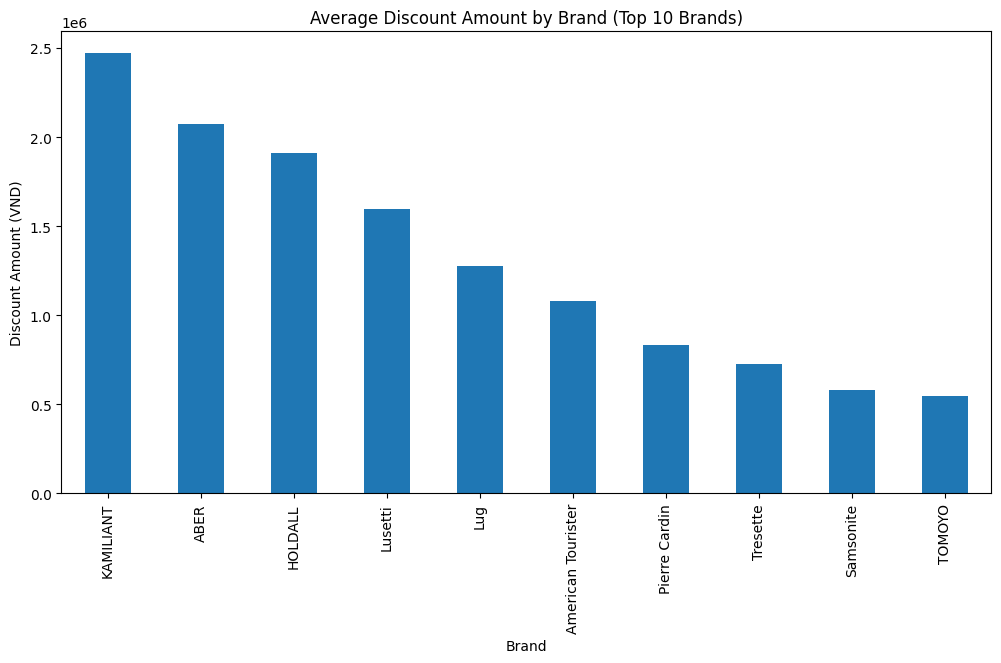

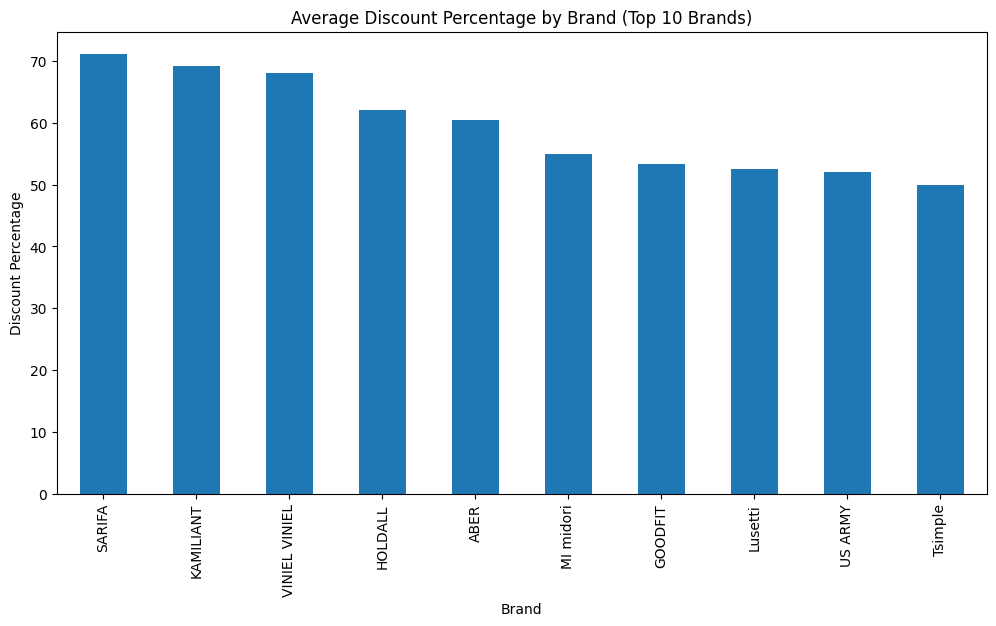

In [22]:
# Calculate discount amount and percentage
filtered_df['discount_amount'] = filtered_df['original_price'] - filtered_df['price']
filtered_df['discount_percentage'] = (filtered_df['discount_amount'] / filtered_df['original_price']) * 100

# Average discount amount by brand
brand_discount_amount = filtered_df.groupby('brand')['discount_amount'].mean().sort_values(ascending=False)
print(brand_discount_amount.head(10))  # Display top 10 brands by average discount amount

# Average discount percentage by brand
brand_discount_percentage = filtered_df.groupby('brand')['discount_percentage'].mean().sort_values(ascending=False)
print(brand_discount_percentage.head(10))  # Display top 10 brands by average discount percentage

# Bar plots to visualize discount by brand (top 10 brands)
plt.figure(figsize=(12, 6))
brand_discount_amount.head(10).plot(kind='bar')
plt.title('Average Discount Amount by Brand (Top 10 Brands)')
plt.xlabel('Brand')
plt.ylabel('Discount Amount (VND)')
plt.show()

plt.figure(figsize=(12, 6))
brand_discount_percentage.head(10).plot(kind='bar')
plt.title('Average Discount Percentage by Brand (Top 10 Brands)')
plt.xlabel('Brand')
plt.ylabel('Discount Percentage')
plt.show()

##4. Customer Ratings by Brand

brand
HANVIET       5.0
LOCAL LION    5.0
WAN           5.0
SHOFUKA       5.0
Aligro        5.0
Camelia       5.0
Tsimple       5.0
LIFE          5.0
ST SOHOGO     5.0
GOODFIT       5.0
Name: rating_average, dtype: float64


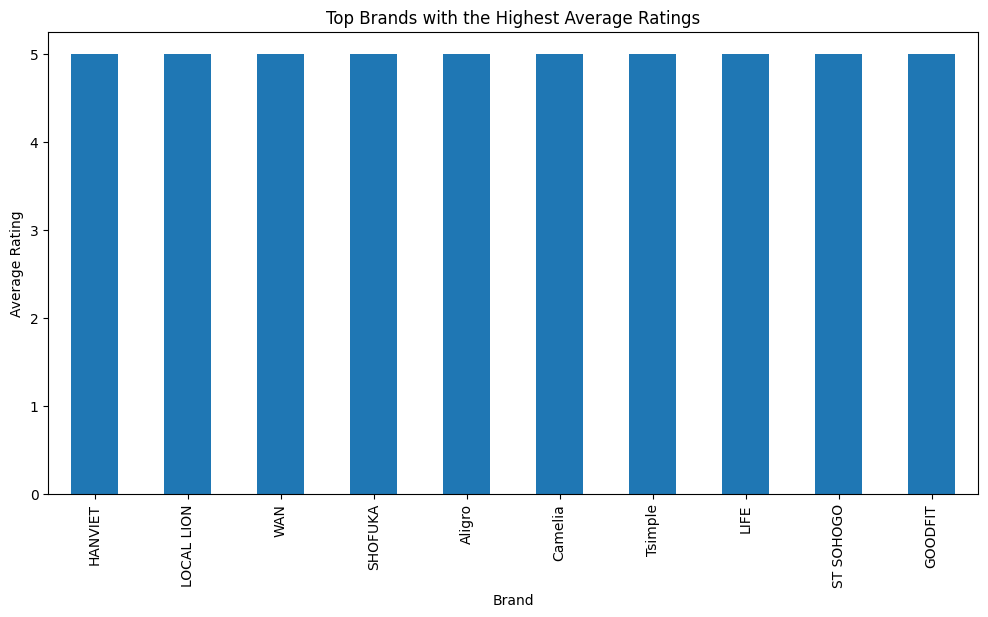

In [23]:
# Average rating by brand
brand_ratings = filtered_df.groupby('brand')['rating_average'].mean().sort_values(ascending=False)
print(brand_ratings.head(10))  # Display top 10 brands by average rating

# Bar plot to visualize average rating by brand (top 10 brands)
plt.figure(figsize=(12, 6))
brand_ratings.head(10).plot(kind='bar')
plt.title('Top Brands with the Highest Average Ratings')
plt.xlabel('Brand')
plt.ylabel('Average Rating')
plt.show()


brand
VANDO                            0.000000
Miley Lingerie                   0.000000
Philips                          0.000000
VICERO                           0.000000
Lug                              0.000000
OURESS                           0.231138
Trương Gia Túi Vải Túi Canvas    0.384118
VHL                              0.438028
LQ luxury                        0.484821
Huy Hoàng                        0.492330
Name: rating_average, dtype: float64


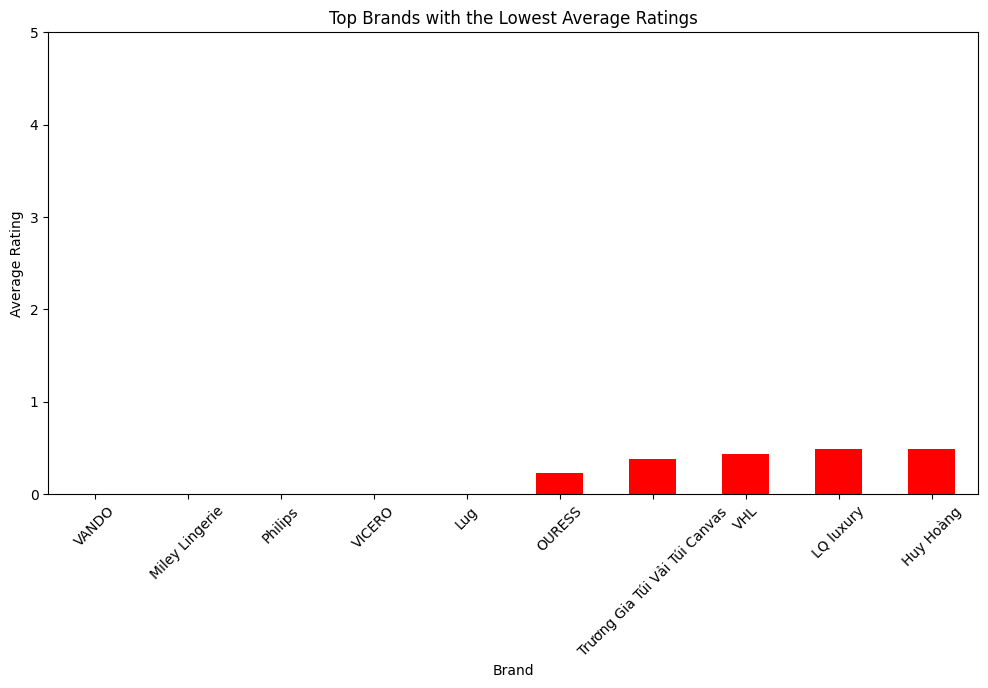

In [24]:
brand_ratings= brand_ratings.sort_values(ascending=True)

# Get the top 10 brands with the lowest average ratings
top_low_ratings = brand_ratings.head(10)

# Display the top 10 brands with the lowest ratings
print(top_low_ratings)

# Plot the top brands with the lowest average ratings
plt.figure(figsize=(12, 6))
top_low_ratings.plot(kind='bar', color='red')
plt.title('Top Brands with the Lowest Average Ratings')
plt.xlabel('Brand')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.ylim(0, 5)  # Assuming ratings are on a 0-5 scale
plt.show()

##5. Popularity by Brand

brand
JM Jamano       882.500000
CAVARA          205.666667
Hier            193.666667
VinBuy          187.333333
CLEANER LENS    140.500000
Laceva          137.458333
Minsu           121.000000
KEIO NIPPON     106.333333
YORN             98.555556
WAN              91.000000
Name: review_count, dtype: float64


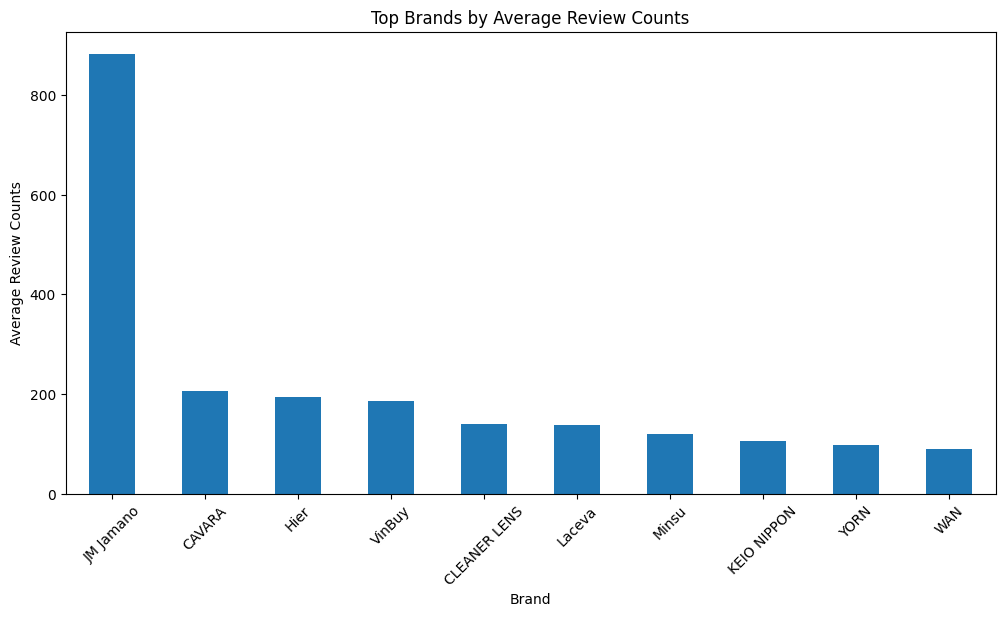

In [25]:
# Calculate average review counts by brand
brand_review_counts = filtered_df.groupby('brand')['review_count'].mean().sort_values(ascending=False)

# Display top brands by average review counts
print(brand_review_counts.head(10))

# Bar plot to visualize the average review counts by brand (top 10 brands)
plt.figure(figsize=(12, 6))
brand_review_counts.head(10).plot(kind='bar')
plt.title('Top Brands by Average Review Counts')
plt.xlabel('Brand')
plt.ylabel('Average Review Counts')
plt.xticks(rotation=45)
plt.show()

##6. Visual Representation of Brand Performance

                           Brand     Avg_Price  Total_Sales  Avg_Sales  \
0                    ANANSHOP688  5.512952e+05         4550  23.096447   
1                        BIGGBEN  3.004550e+05         4980  26.349206   
2                        Bee Gee  3.936925e+05         3186  18.310345   
3                       Converse  1.586898e+06         1674   9.000000   
4                         GOMTAT  6.574115e+04        15962  83.135417   
5                      Huy Hoàng  4.586614e+05          373   1.059659   
6                     Hạnh Dương  6.132811e+04         5277  23.246696   
7                            OEM  1.517817e+05       337216  10.827639   
8                    Song An Eco  4.261556e+04         9393  18.453831   
9  Trương Gia Túi Vải Túi Canvas  4.189706e+04          200   1.176471   

   Avg_Discount_Amount  Avg_Discount_Percentage  Avg_Rating  
0         62468.071066                10.031547    3.383249  
1        140169.312169                31.322425    3.624868  

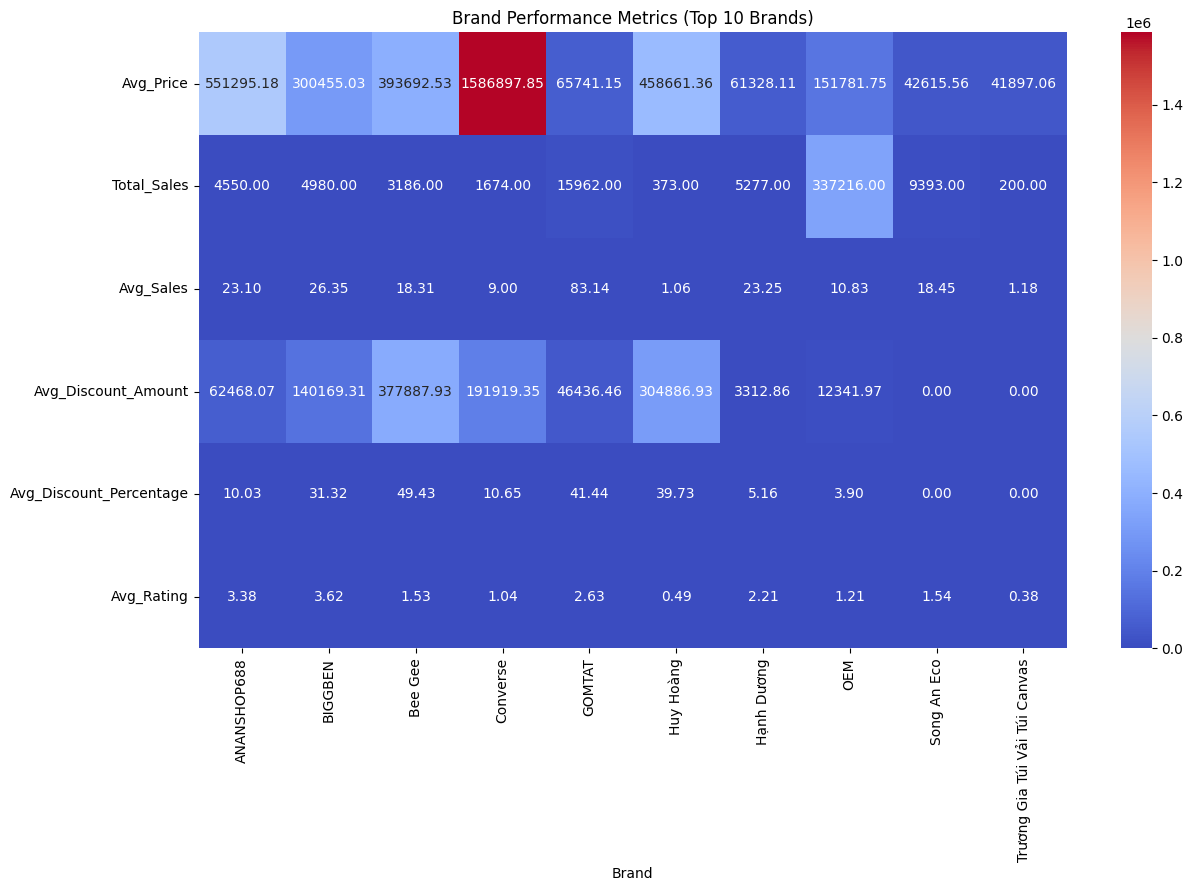

In [26]:
# Selecting top brands for analysis
top_brands = filtered_df['brand'].value_counts().index[:10]

# Aggregated metrics for top brands
brand_performance = filtered_df[filtered_df['brand'].isin(top_brands)].groupby('brand').agg({
    'price': 'mean',
    'quantity_sold': ['sum', 'mean'],
    'discount_amount': 'mean',
    'discount_percentage': 'mean',
    'rating_average': 'mean',
}).reset_index()

# Rename columns for better readability
brand_performance.columns = ['Brand', 'Avg_Price', 'Total_Sales', 'Avg_Sales', 'Avg_Discount_Amount', 'Avg_Discount_Percentage', 'Avg_Rating']

# Display brand performance
print(brand_performance)

# Heatmap of brand performance metrics
plt.figure(figsize=(14, 8))
sns.heatmap(brand_performance.set_index('Brand').T, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Brand Performance Metrics (Top 10 Brands)')
plt.show()


#Type-Based Analysis

##1. Market Share of Product Types



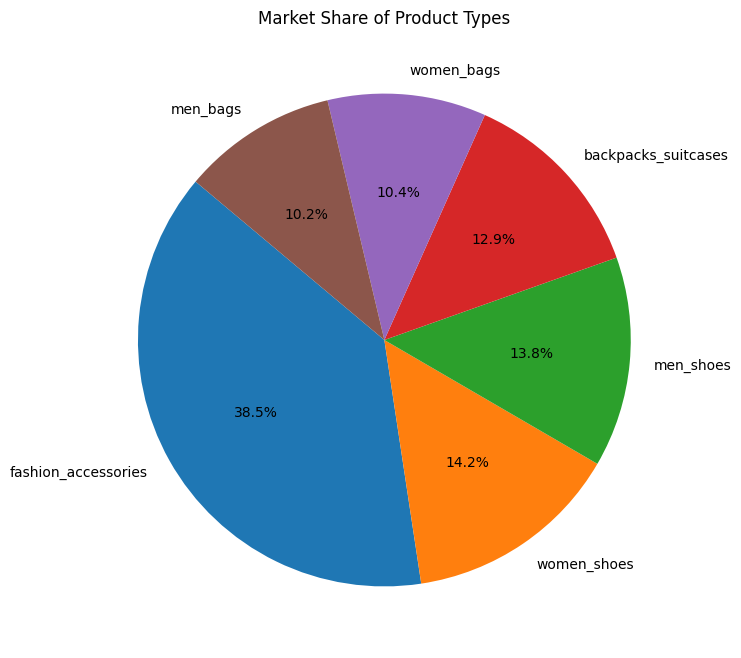

In [27]:
# Count the number of products in each type
type_distribution = combined_df['type'].value_counts()

# Plot pie chart for Market Share by type
plt.figure(figsize=(8, 8))
plt.pie(type_distribution, labels=type_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Market Share of Product Types')
plt.show()


##2. Price Analysis by Type

In [28]:
# Calculate summary statistics for price by type
price_summary_by_type = combined_df.groupby('type')['price'].describe()

# Display summary statistics
print(price_summary_by_type)

                       count           mean           std     min      25%  \
type                                                                         
backpacks_suitcases   5361.0  497216.379407  1.222992e+06  1000.0  50000.0   
fashion_accessories  16017.0   82037.593182  1.952320e+05  1000.0  23000.0   
men_bags              4234.0  580201.698158  1.242942e+06  1350.0  99000.0   
men_shoes             5744.0  372428.812674  6.516985e+05  4000.0  85000.0   
women_bags            4325.0  247528.782890  9.336393e+05     0.0  41000.0   
women_shoes           5919.0  284161.841189  5.067012e+05  1000.0  63875.0   

                          50%       75%         max  
type                                                 
backpacks_suitcases  159000.0  490000.0  18840000.0  
fashion_accessories   45000.0   89000.0  11900000.0  
men_bags             185000.0  450000.0  19800000.0  
men_shoes            180000.0  349000.0  14700000.0  
women_bags            69000.0  168000.0  17500000.0

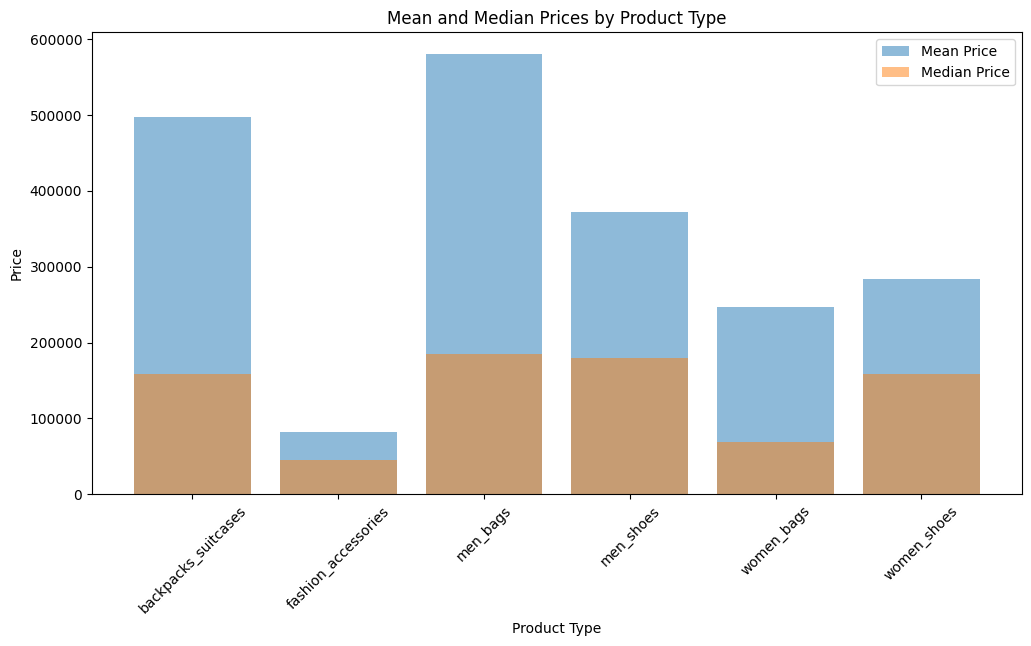

In [29]:
# Calculate mean and median prices by type
mean_price_by_type = combined_df.groupby('type')['price'].mean()
median_price_by_type = combined_df.groupby('type')['price'].median()

# Plot mean and median prices by type
plt.figure(figsize=(12, 6))
plt.bar(mean_price_by_type.index, mean_price_by_type, alpha=0.5, label='Mean Price')
plt.bar(median_price_by_type.index, median_price_by_type, alpha=0.5, label='Median Price')
plt.title('Mean and Median Prices by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()

##3. Rating Analysis by Type

Average Rating by Product Type:
type
women_bags             1.012370
men_bags               1.249457
fashion_accessories    1.297397
backpacks_suitcases    1.501343
men_shoes              1.621083
women_shoes            1.635192
Name: rating_average, dtype: float64


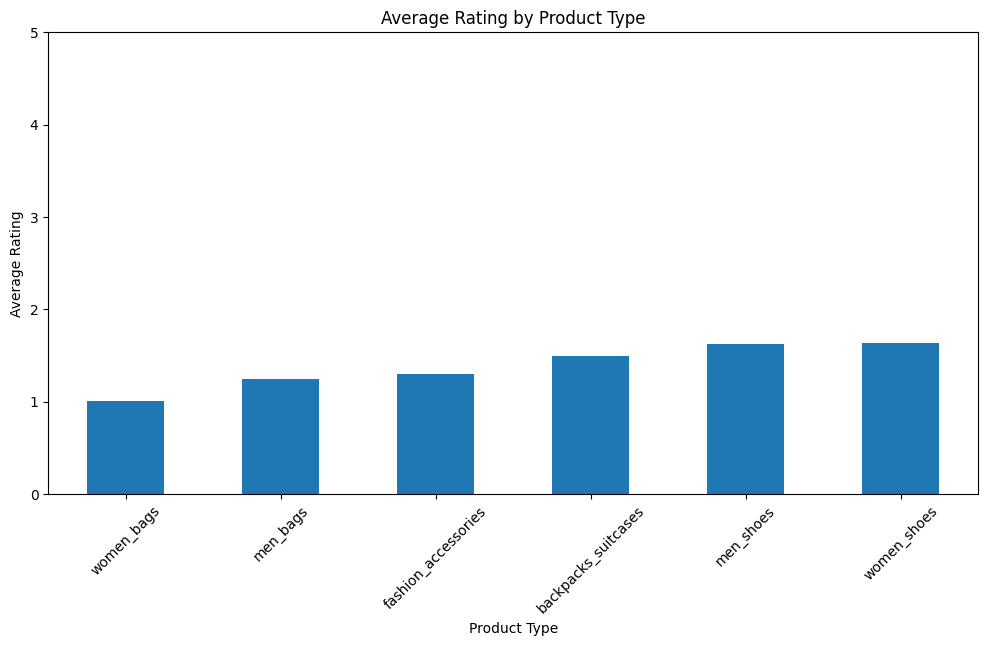

In [30]:
# Calculate average rating by product type
avg_rating_by_type = combined_df.groupby('type')['rating_average'].mean().sort_values()

# Display average ratings
print('Average Rating by Product Type:')
print(avg_rating_by_type)


# Bar plot for average rating by product type
plt.figure(figsize=(12, 6))
avg_rating_by_type.plot(kind='bar')
plt.title('Average Rating by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.ylim(0, 5)  # Assuming ratings are on a 0-5 scale
plt.show()


#Impact of Visual Content

##1. Impact on Sales

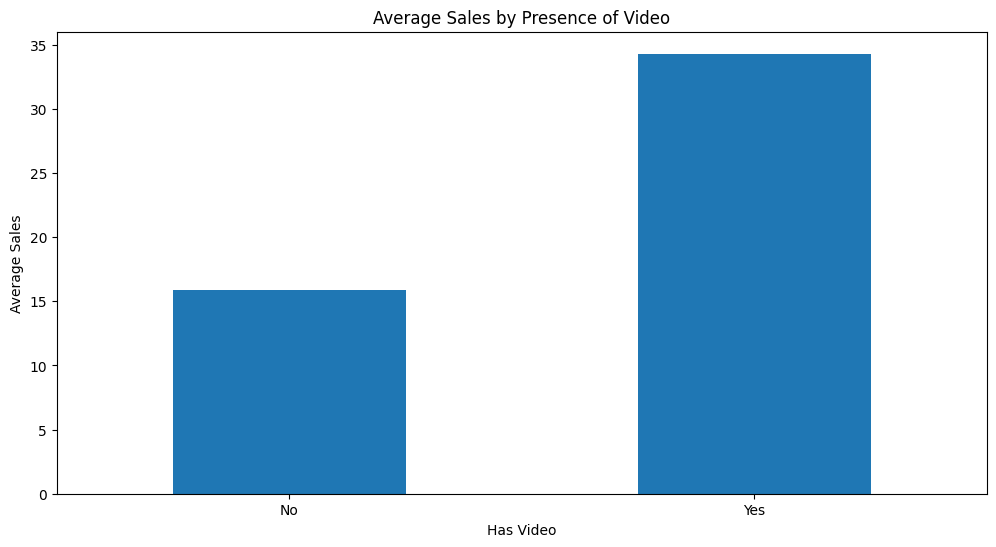

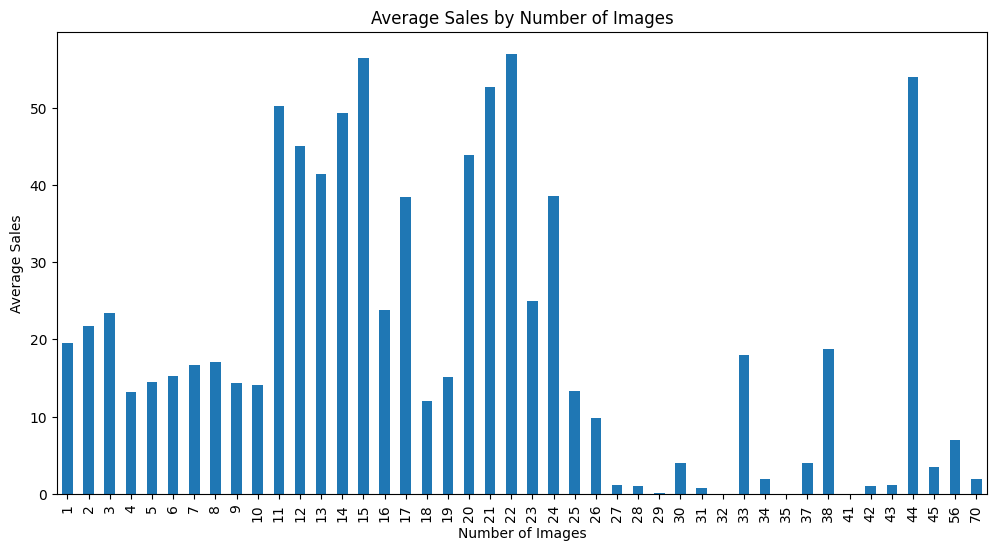

In [32]:
# Calculate average and total sales for products with and without videos
sales_by_video = combined_df.groupby('has_video')['quantity_sold'].agg(['mean', 'sum'])

# Calculate average and total sales for products with image counts
sales_by_image = combined_df.groupby('number_of_images')['quantity_sold'].agg(['mean', 'sum'])

# Bar plots for sales impact by video presence
plt.figure(figsize=(12, 6))
sales_by_video['mean'].plot(kind='bar')
plt.title('Average Sales by Presence of Video')
plt.xlabel('Has Video')
plt.ylabel('Average Sales')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.show()

# Bar plots for sales impact by number of images
plt.figure(figsize=(12, 6))
sales_by_image['mean'].plot(kind='bar')
plt.title('Average Sales by Number of Images')
plt.xlabel('Number of Images')
plt.ylabel('Average Sales')
plt.show()

##2. Impact on Ratings

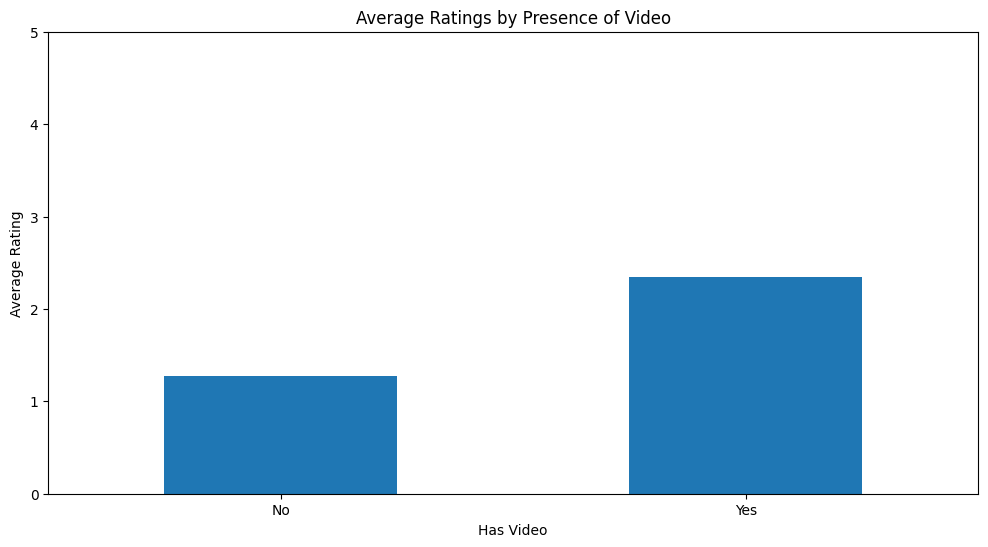

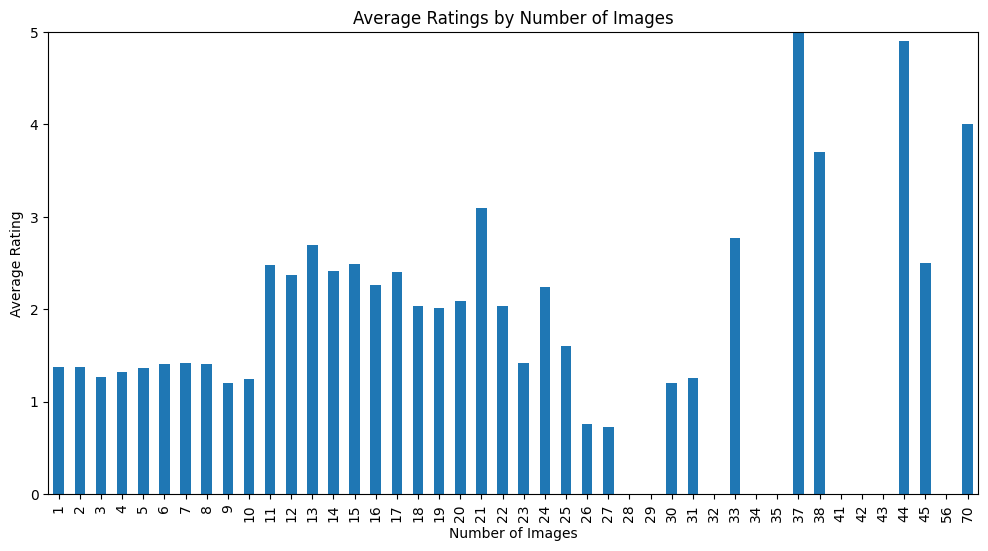

In [33]:
# Calculate average ratings for products with and without videos
ratings_by_video = combined_df.groupby('has_video')['rating_average'].mean()

# Calculate average ratings for products with different numbers of images
ratings_by_image = combined_df.groupby('number_of_images')['rating_average'].mean()


# Bar plots for ratings impact by video presence
plt.figure(figsize=(12, 6))
ratings_by_video.plot(kind='bar')
plt.title('Average Ratings by Presence of Video')
plt.xlabel('Has Video')
plt.ylabel('Average Rating')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.ylim(0, 5)  # Assuming ratings are on a 0-5 scale
plt.show()

# Bar plots for ratings impact by number of images
plt.figure(figsize=(12, 6))
ratings_by_image.plot(kind='bar')
plt.title('Average Ratings by Number of Images')
plt.xlabel('Number of Images')
plt.ylabel('Average Rating')
plt.ylim(0, 5)  # Assuming ratings are on a 0-5 scale
plt.show()

##3.  Impact on Review Counts

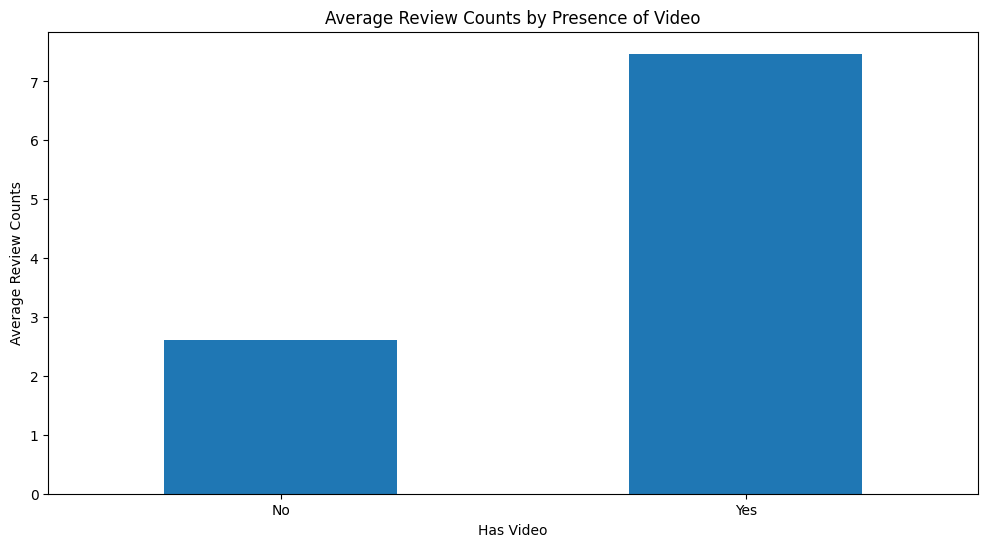

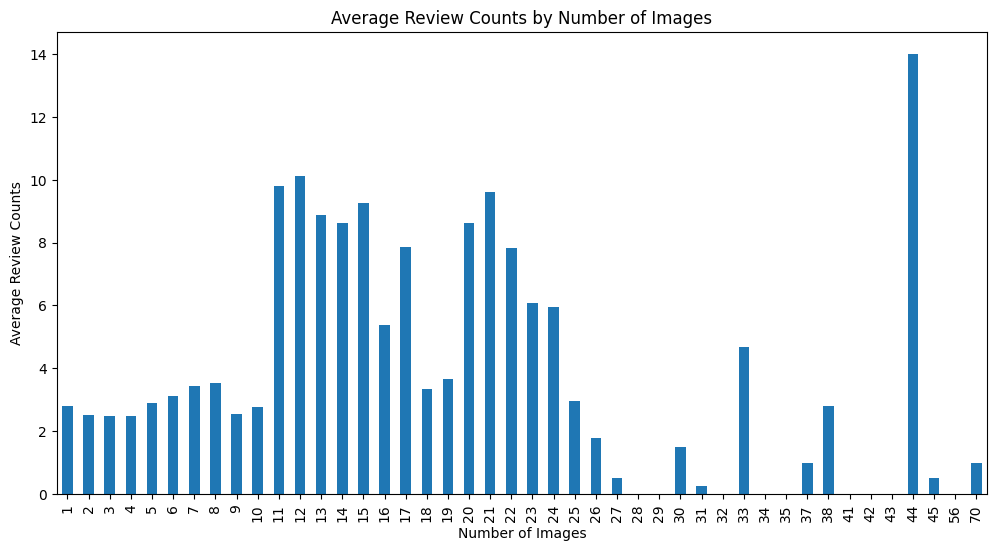

In [34]:
# Calculate Average review counts for products with and without videos
review_counts_by_video = combined_df.groupby('has_video')['review_count'].mean()

# Calculate Average review counts for products with different numbers of images
review_counts_by_image = combined_df.groupby('number_of_images')['review_count'].mean()

# Bar plots for review counts impact by video presence
plt.figure(figsize=(12, 6))
review_counts_by_video.plot(kind='bar')
plt.title('Average Review Counts by Presence of Video')
plt.xlabel('Has Video')
plt.ylabel('Average Review Counts')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.show()

# Bar plots for review counts impact by number of images
plt.figure(figsize=(12, 6))
review_counts_by_image.plot(kind='bar')
plt.title('Average Review Counts by Number of Images')
plt.xlabel('Number of Images')
plt.ylabel('Average Review Counts')
plt.show()


##4. Price Comparison

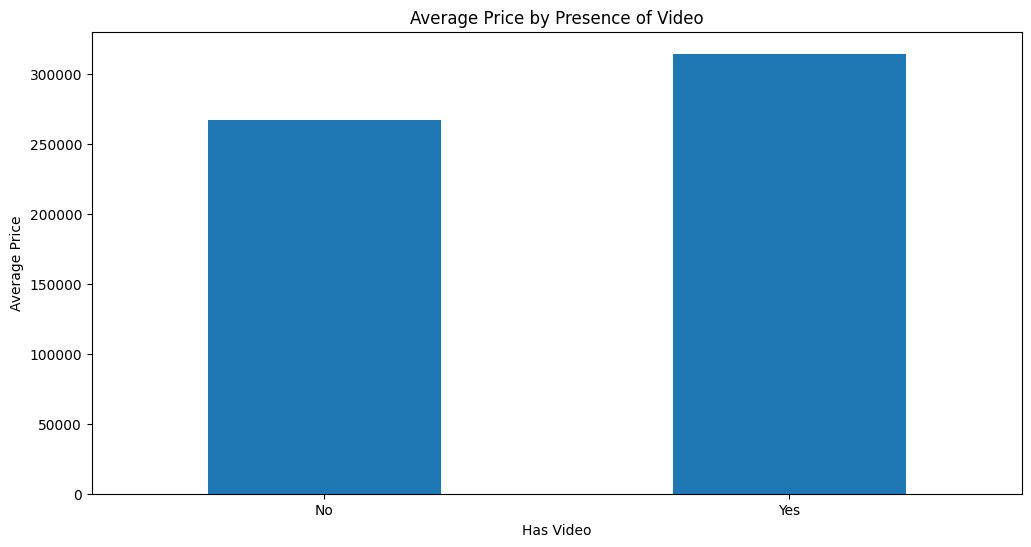

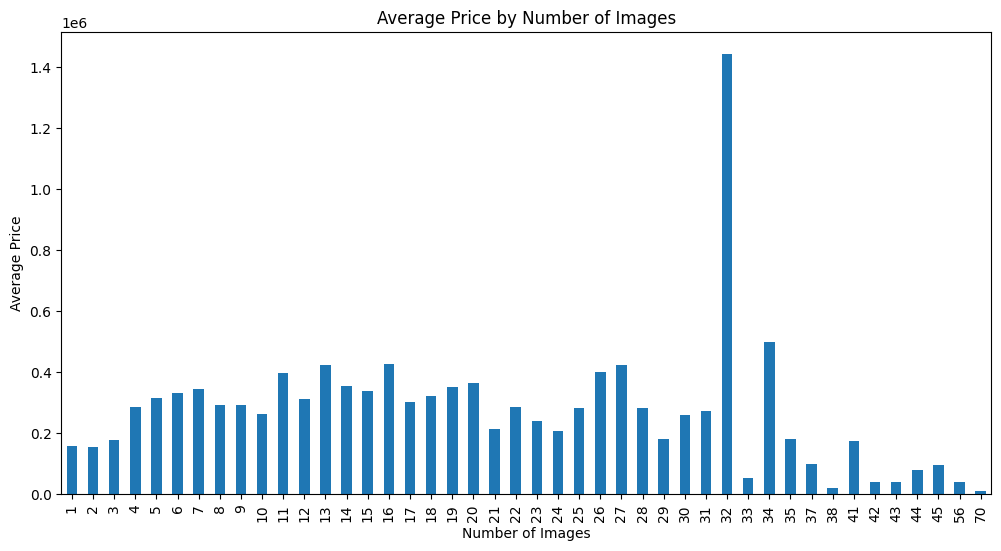

In [35]:
# Calculate average price for products with and without videos
price_by_video = combined_df.groupby('has_video')['price'].mean()

# Calculate average price for products with different numbers of images
price_by_image = combined_df.groupby('number_of_images')['price'].mean()

# Bar plots for price comparison by video presence
plt.figure(figsize=(12, 6))
price_by_video.plot(kind='bar')
plt.title('Average Price by Presence of Video')
plt.xlabel('Has Video')
plt.ylabel('Average Price')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.show()

# Bar plots for price comparison by number of images
plt.figure(figsize=(12, 6))
price_by_image.plot(kind='bar')
plt.title('Average Price by Number of Images')
plt.xlabel('Number of Images')
plt.ylabel('Average Price')
plt.show()


#Pay Later Program Impact

##1. Impact on Sales

Sales Impact by Pay Later Program:
                mean     sum
pay_later                   
False      23.179465  535492
True       11.016164  203777


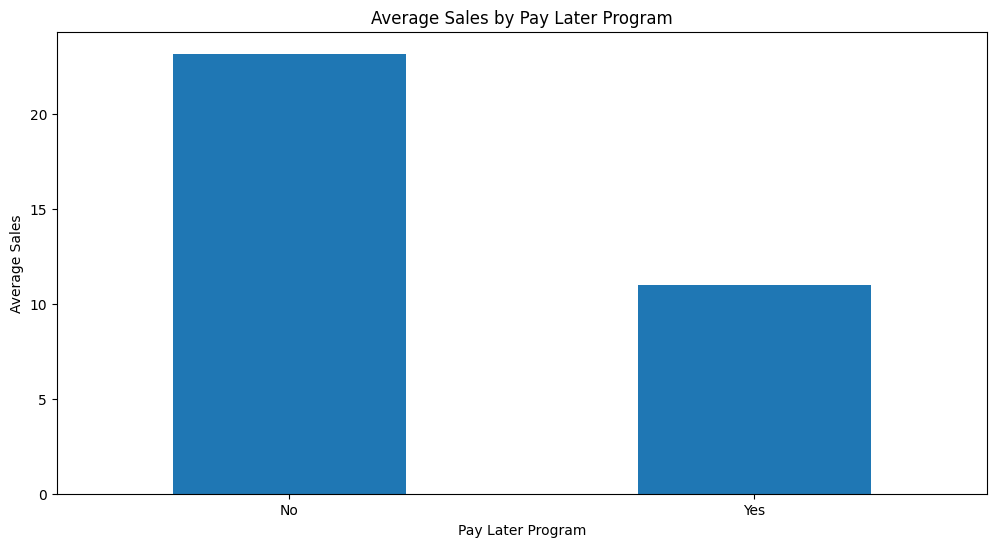

In [36]:
# Calculate average and total sales for products with and without the Pay Later option
sales_by_pay_later = combined_df.groupby('pay_later')['quantity_sold'].agg(['mean', 'sum'])

# Display results
print('Sales Impact by Pay Later Program:')
print(sales_by_pay_later)

# Bar plots for sales impact by Pay Later option
plt.figure(figsize=(12, 6))
sales_by_pay_later['mean'].plot(kind='bar')
plt.title('Average Sales by Pay Later Program')
plt.xlabel('Pay Later Program')
plt.ylabel('Average Sales')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.show()

##2. Price Comparison

Average Price by Pay Later Program:
pay_later
False     79402.604147
True     513219.547681
Name: price, dtype: float64


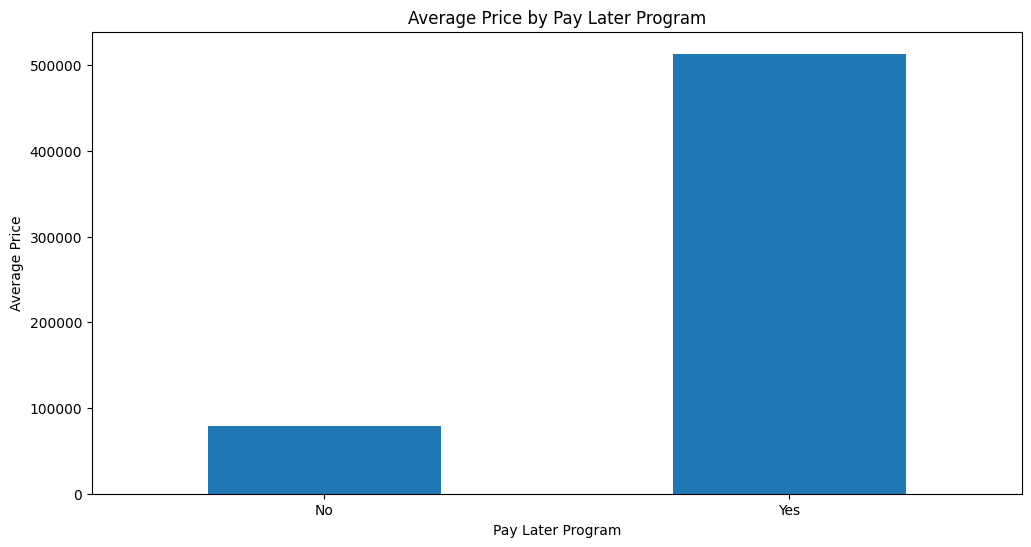

In [37]:
# Calculate average price for products with and without the Pay Later option
price_by_pay_later = combined_df.groupby('pay_later')['price'].mean()

# Display results
print('Average Price by Pay Later Program:')
print(price_by_pay_later)

# Bar plots for price comparison by Pay Later option
plt.figure(figsize=(12, 6))
price_by_pay_later.plot(kind='bar')
plt.title('Average Price by Pay Later Program')
plt.xlabel('Pay Later Program')
plt.ylabel('Average Price')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.show()


#Time-Based Analysis

In [38]:
combined_df['date_created'].describe()

count                            41600
mean     1970-01-01 00:00:00.000000711
min                1970-01-01 00:00:00
25%      1970-01-01 00:00:00.000000397
50%      1970-01-01 00:00:00.000000616
75%      1970-01-01 00:00:00.000000831
max      1970-01-01 00:00:00.000738076
Name: date_created, dtype: object

In [43]:
combined_df = combined_df[combined_df['date_created'] <= 3650]

In [46]:
# Convert date_created to a datetime format if not already done
combined_df['date_created'] = pd.to_datetime('today') - pd.to_timedelta(combined_df['date_created'], unit='D')

# Extract year and quarter from date_created
combined_df['year'] = combined_df['date_created'].dt.year
combined_df['quarter'] = combined_df['date_created'].dt.quarter

# Filter data for entries from 2018 onwards
filtered_df = combined_df[combined_df['year'] >= 2018]


##1.  Sales Over Time

In [47]:
# Calculate total sales over time (by quarter in this example)
sales_over_time_quarterly = filtered_df.groupby(['year', 'quarter'])['quantity_sold'].sum()

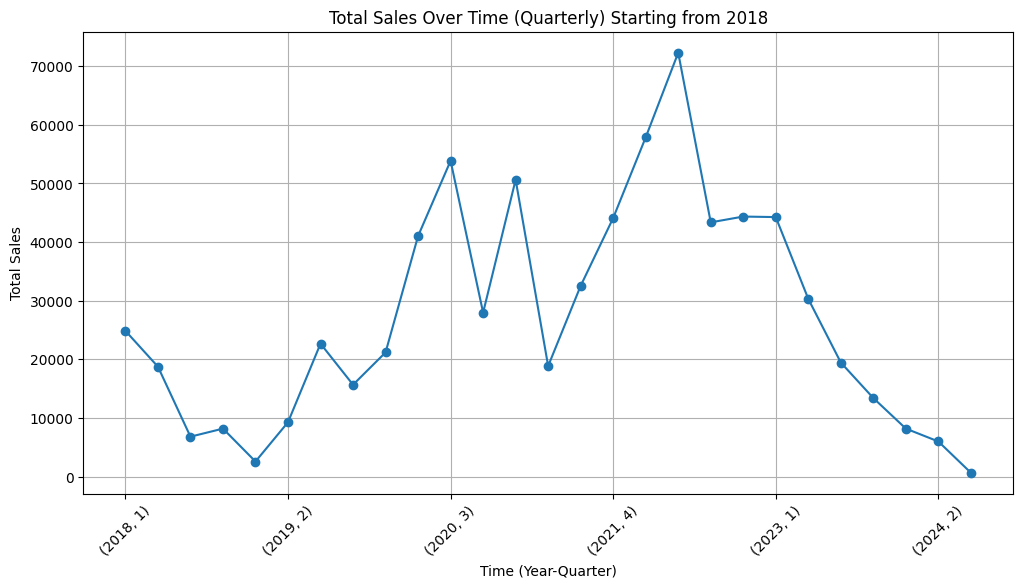

In [48]:
# Plot sales over time on a quarterly basis
plt.figure(figsize=(12, 6))
sales_over_time_quarterly.plot(kind='line', marker='o')
plt.title('Total Sales Over Time (Quarterly) Starting from 2018')
plt.xlabel('Time (Year-Quarter)')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

##2. Rating Over Time

In [49]:
# Calculate average rating over time (by quarter in this example)
ratings_over_time_quarterly = filtered_df.groupby(['year', 'quarter'])['rating_average'].mean()

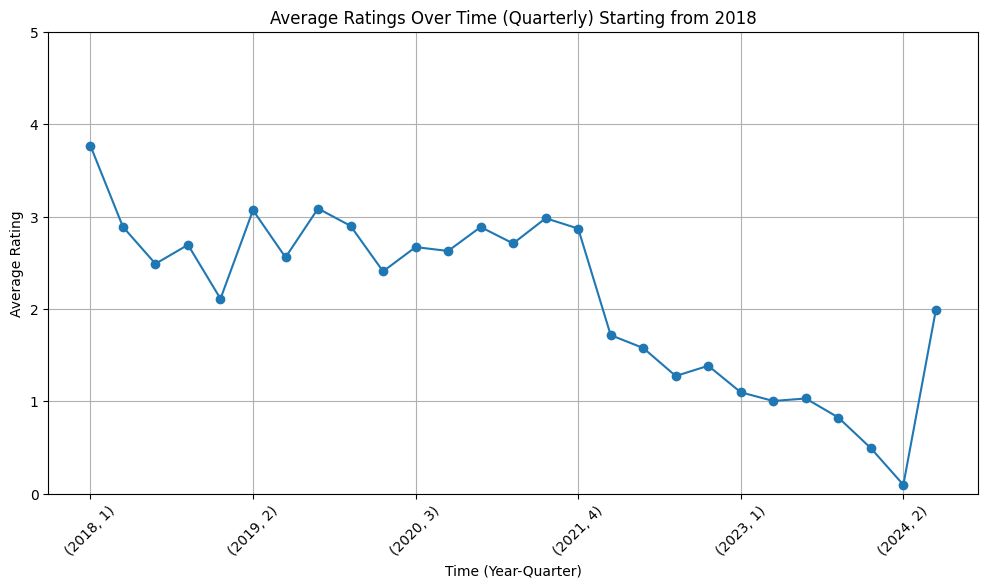

In [50]:
# Plot ratings over time on a quarterly basis
plt.figure(figsize=(12, 6))
ratings_over_time_quarterly.plot(kind='line', marker='o')
plt.title('Average Ratings Over Time (Quarterly) Starting from 2018')
plt.xlabel('Time (Year-Quarter)')
plt.ylabel('Average Rating')
plt.ylim(0, 5)  # Assuming ratings are on a 0-5 scale
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

##3. Price Trends Over Time

In [51]:
# Calculate average price over time (by month in this example)
price_over_time_quarterly = filtered_df.groupby(['year', 'quarter'])['price'].mean()

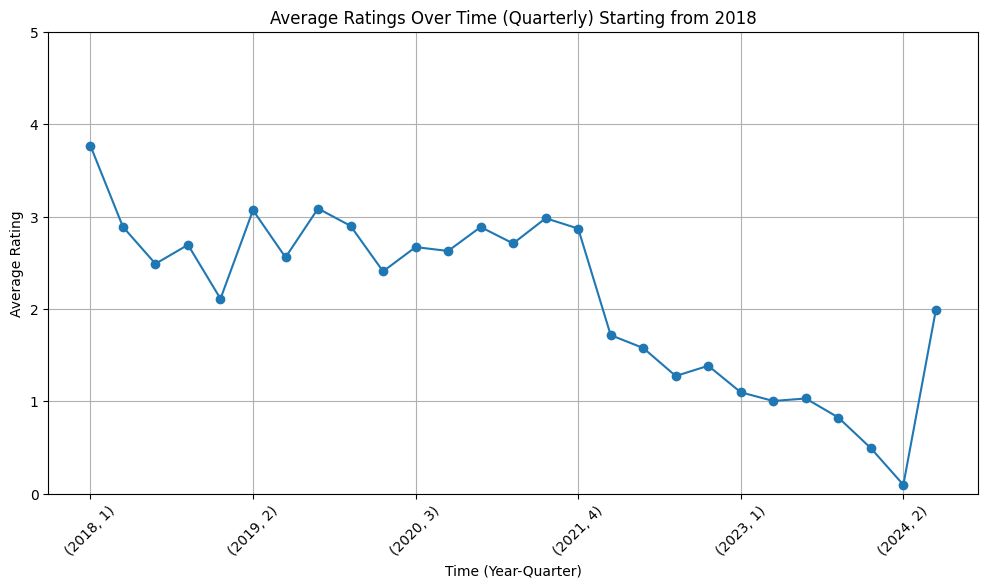

In [52]:
# Plot ratings over time on a quarterly basis
plt.figure(figsize=(12, 6))
ratings_over_time_quarterly.plot(kind='line', marker='o')
plt.title('Average Ratings Over Time (Quarterly) Starting from 2018')
plt.xlabel('Time (Year-Quarter)')
plt.ylabel('Average Rating')
plt.ylim(0, 5)  # Assuming ratings are on a 0-5 scale
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

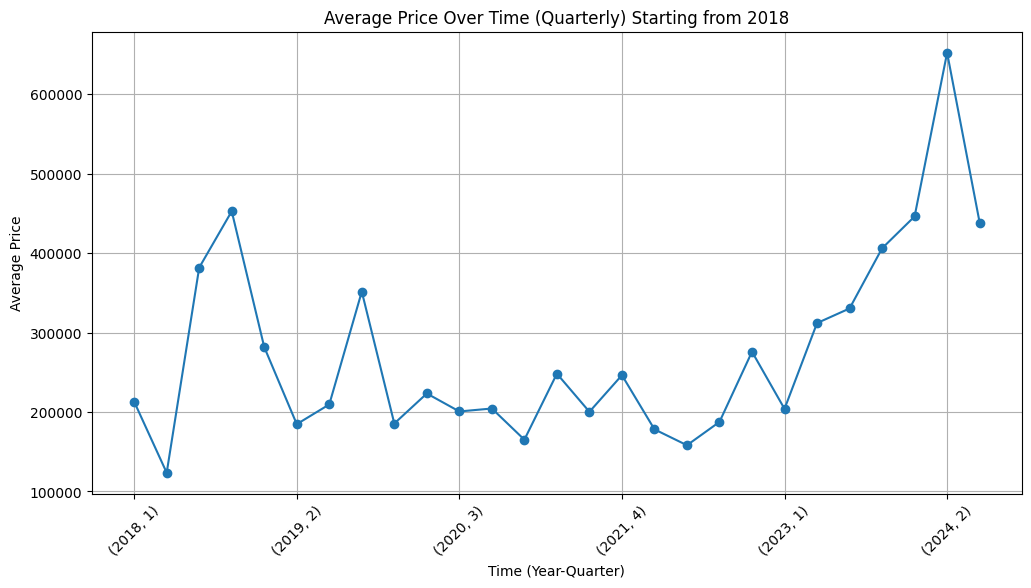

In [53]:
# Plot price trends over time
plt.figure(figsize=(12, 6))
price_over_time_quarterly.plot(kind='line', marker='o')
plt.title('Average Price Over Time (Quarterly) Starting from 2018')
plt.xlabel('Time (Year-Quarter)')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#Seller Performance Analysis

In [54]:
# Calculate total sales by seller
total_sales_by_seller = combined_df.groupby('current_seller')['quantity_sold'].sum()

In [55]:
total_sales_by_seller.describe()

count     3807.000000
mean       194.182033
std       1217.507870
min          0.000000
25%          0.000000
50%          4.000000
75%         45.000000
max      39372.000000
Name: quantity_sold, dtype: float64

In [56]:
sales_threshold = 190
# Filter sellers based on the sales threshold
filtered_sellers = total_sales_by_seller[total_sales_by_seller >= sales_threshold].index

# Filter the dataset to include only the filtered sellers
filtered_df = combined_df[combined_df['current_seller'].isin(filtered_sellers)]

##1. Average Product Price by Seller

In [57]:
# Calculate average product price by seller
average_price_by_seller = filtered_df.groupby('current_seller')['price'].mean().sort_values(ascending=False)

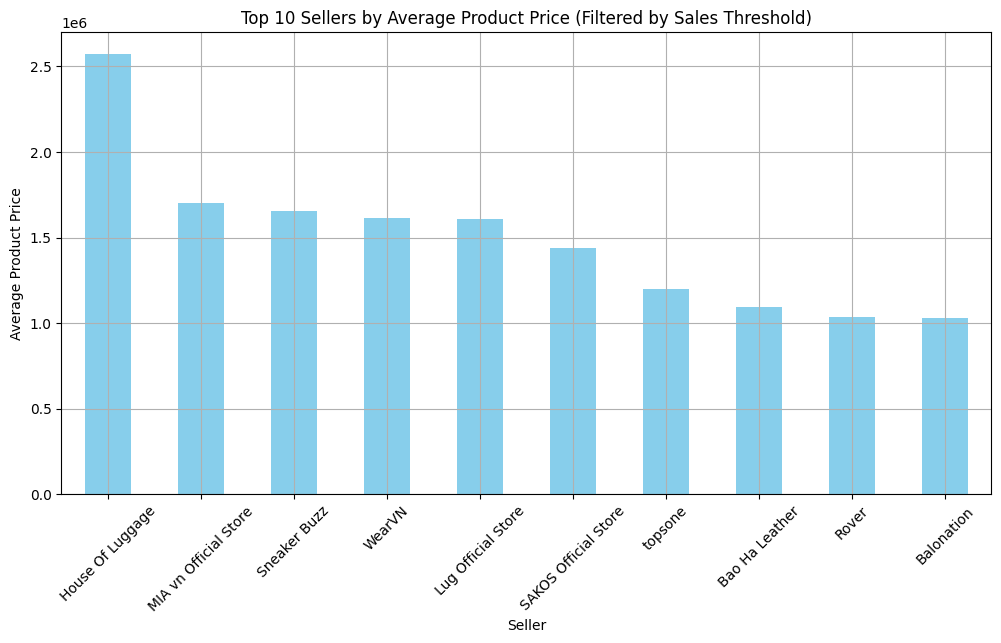

In [58]:
# Plot average product price by seller
plt.figure(figsize=(12, 6))
average_price_by_seller.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Sellers by Average Product Price (Filtered by Sales Threshold)')
plt.xlabel('Seller')
plt.ylabel('Average Product Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

##2.  Total Sales by Seller

In [59]:
# Calculate total sales by seller
total_sales_by_seller_filtered = filtered_df.groupby('current_seller')['quantity_sold'].sum().sort_values(ascending=False)

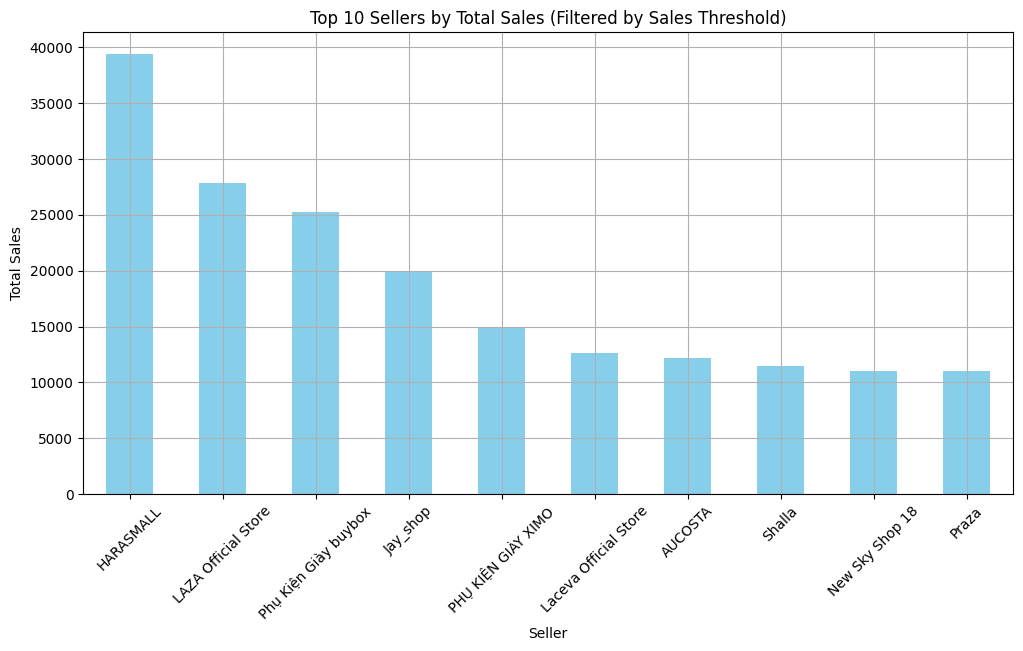

In [60]:
# Plot total sales by seller
plt.figure(figsize=(12, 6))
total_sales_by_seller_filtered.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Sellers by Total Sales (Filtered by Sales Threshold)')
plt.xlabel('Seller')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


##3. Number of Products Offered by Seller

In [61]:
# Calculate number of products offered by seller
number_of_products_by_seller = filtered_df['current_seller'].value_counts()


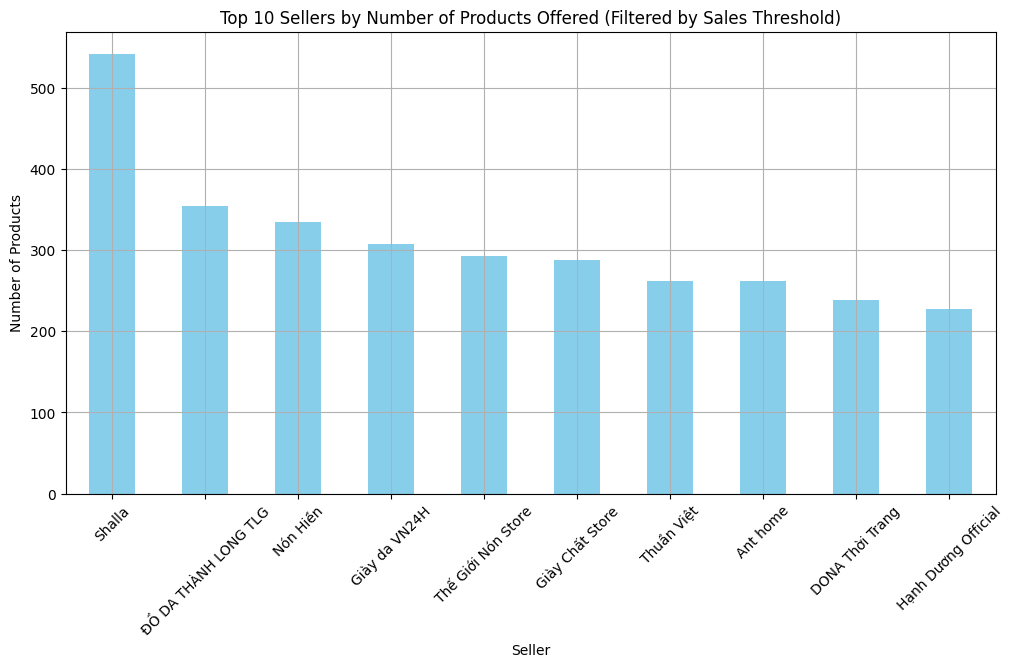

In [62]:
# Plot number of products offered by seller
plt.figure(figsize=(12, 6))
number_of_products_by_seller.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Sellers by Number of Products Offered (Filtered by Sales Threshold)')
plt.xlabel('Seller')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#Text Analysis on Product Descriptions

##1. Word Cloud

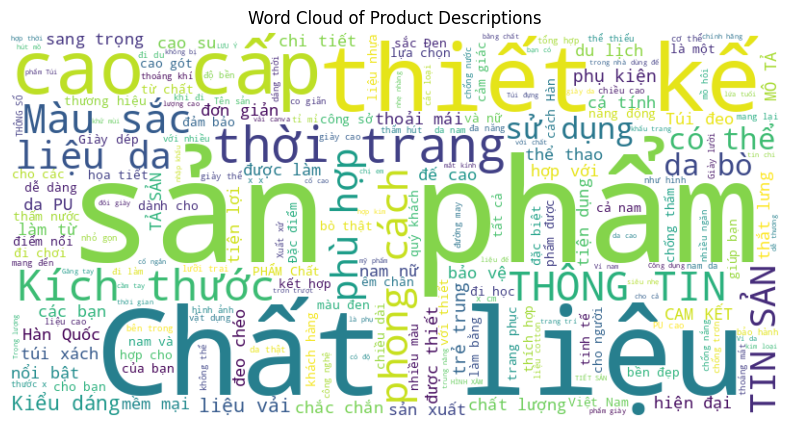

In [63]:
from wordcloud import WordCloud

# Combine all product descriptions into a single string
all_descriptions = ' '.join(combined_df['description'].dropna())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_descriptions)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Product Descriptions')
plt.show()

##2. Common Keywords and Phrases

In [64]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer instance
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 2), max_features=20)

# Fit and transform the descriptions
X = vectorizer.fit_transform(combined_df['description'].dropna())

# Get the feature names and their counts
keywords = vectorizer.get_feature_names_out()
counts = X.toarray().sum(axis=0)

# Create a DataFrame for the keywords and their counts
keywords_df = pd.DataFrame({'keyword': keywords, 'count': counts}).sort_values(by='count', ascending=False)

# Display the top 20 keywords and phrases
print('Top 20 Keywords and Phrases:')
print(keywords_df.head(20))

Top 20 Keywords and Phrases:
      keyword  count
13        sản  19731
2        chất  19496
0         cao  18318
8        liệu  17805
12       phẩm  17570
14   sản phẩm  16283
17         và  15320
5          da  15181
3   chất liệu  14770
4          có  13476
6        giày  12775
10        nam  12218
9         màu  11707
19       được  11689
1         cho  11567
15      trang  11336
18        với  10665
11         nữ  10055
7         hợp  10037
16        túi   9829


##3. Category-Specific Analysis

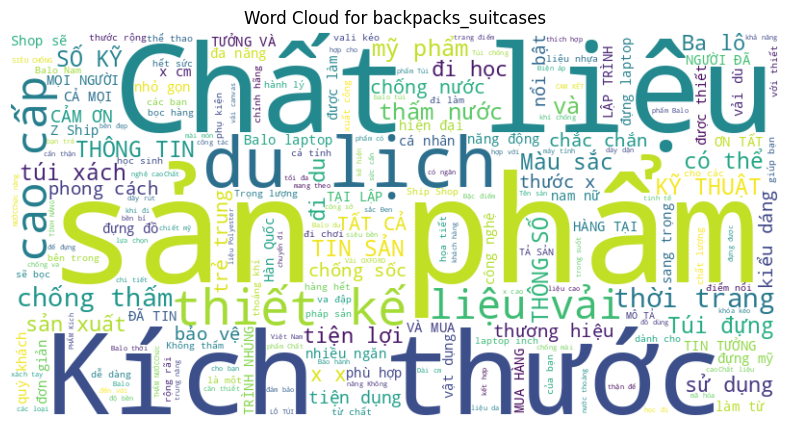

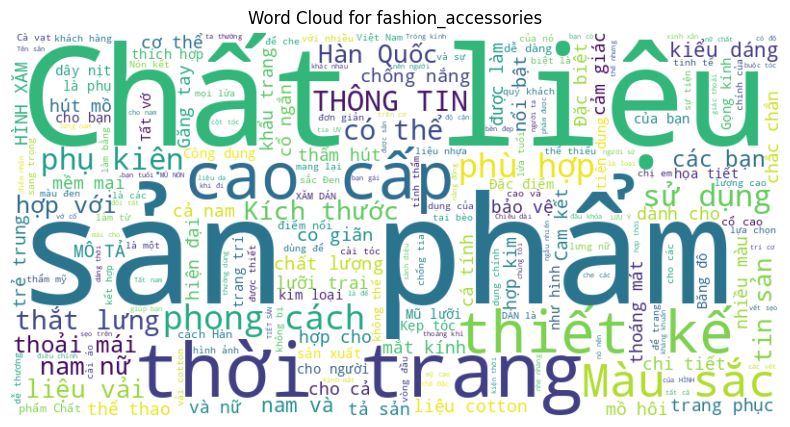

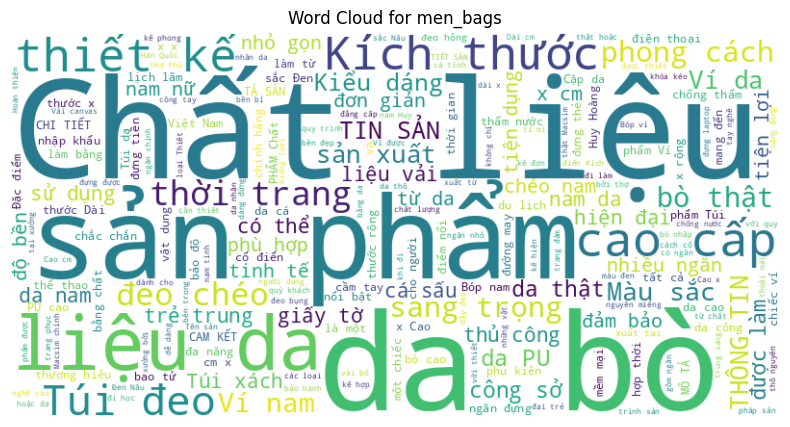

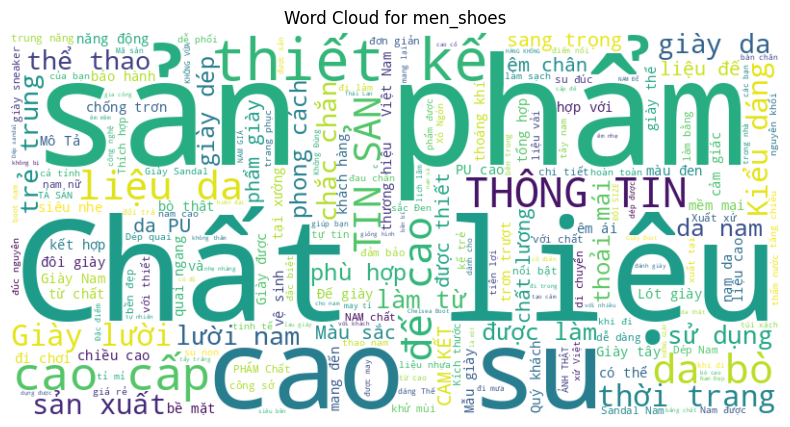

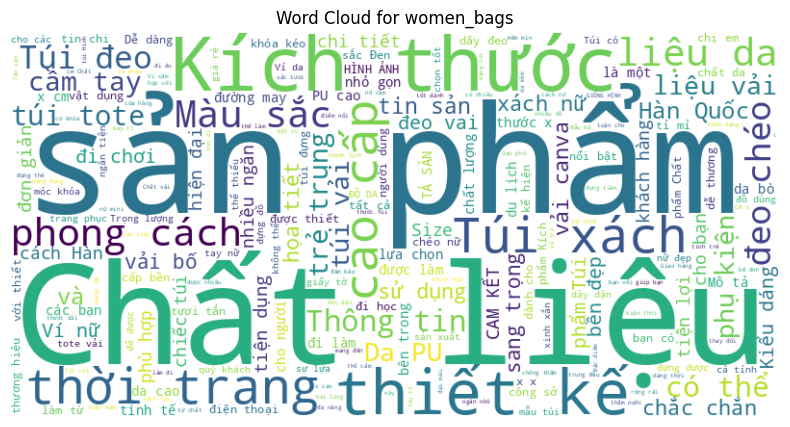

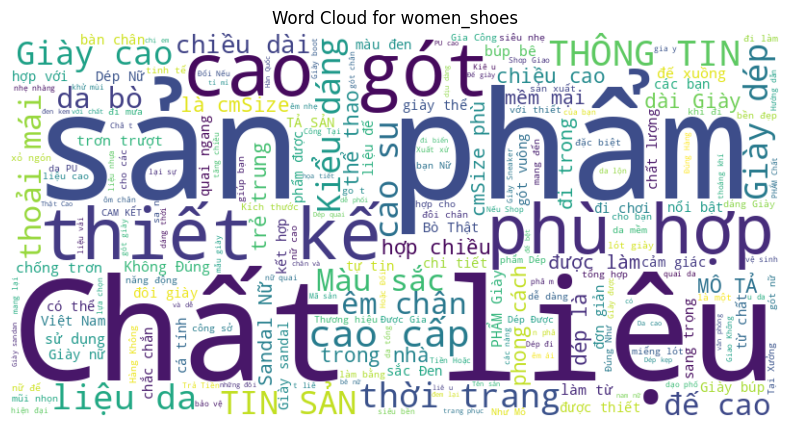

In [65]:
# Function to plot word cloud by category
def plot_wordcloud_by_category(df, category):
    category_descriptions = ' '.join(df[df['type'] == category]['description'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(category_descriptions)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {category}')
    plt.show()

# List of product types
product_types = combined_df['type'].unique()

# Plot word clouds for each product type
for product_type in product_types:
    print('\n')
    plot_wordcloud_by_category(combined_df, product_type)


##4. Length of Descriptions

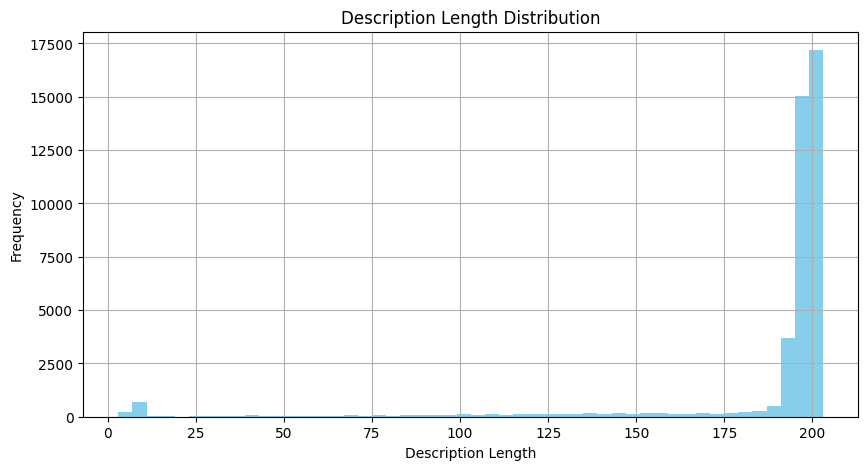

Average Description Length by Category:
type
men_bags               192.852149
backpacks_suitcases    191.883912
women_shoes            187.593175
women_bags             187.252254
men_shoes              185.794952
fashion_accessories    183.594856
Name: description_length, dtype: float64


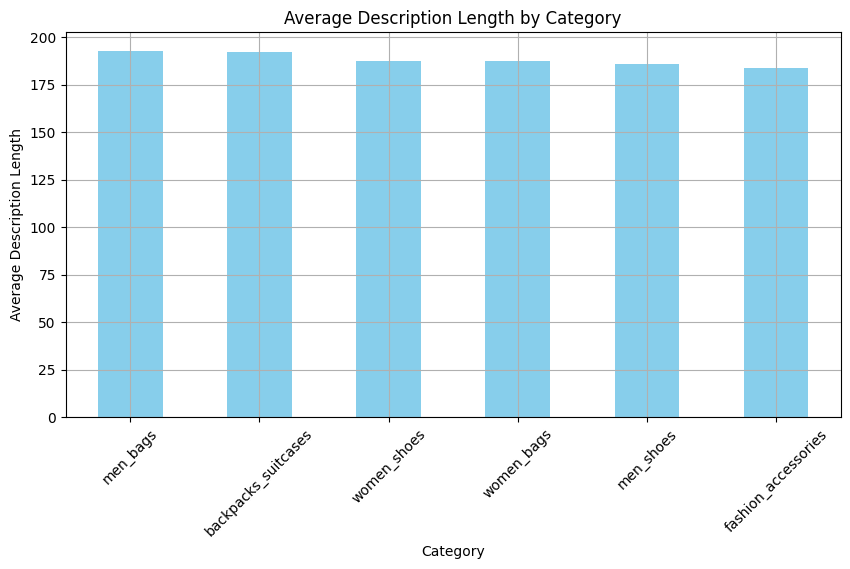

In [66]:
# Calculate the length of each description
combined_df['description_length'] = combined_df['description'].dropna().apply(len)

# Plot description length distribution
plt.figure(figsize=(10, 5))
combined_df['description_length'].hist(bins=50, color='skyblue')
plt.title('Description Length Distribution')
plt.xlabel('Description Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Compare average description length by category
avg_description_length_by_category = combined_df.groupby('type')['description_length'].mean().sort_values(ascending=False)

# Display average description length by category
print('Average Description Length by Category:')
print(avg_description_length_by_category)

# Plot average description length by category
plt.figure(figsize=(10, 5))
avg_description_length_by_category.plot(kind='bar', color='skyblue')
plt.title('Average Description Length by Category')
plt.xlabel('Category')
plt.ylabel('Average Description Length')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()